In [1]:
%load_ext autoreload
%autoreload 2

import pyattimo

from motiflets.motiflets import *
from motiflets.plotting import *

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

In [2]:
# load a dataset, any list of numpy array of floats works fine
# The following call loads the first 100000 points of the ECG 
# dataset (which will be downloaded from the internet)
file = 'ecg-heartbeat-av.csv'
ds_name = "ECG Heartbeat"
series, df_gt = read_dataset_with_index(file)
# series = series.iloc[::2]
ds_name = "ECG"

print("Size of DS: ", series.shape)

Dataset Original Length n:  3000
Dataset Sampled Length n:  3000
../datasets/ground_truth/ecg-heartbeat-av_gt.csv
Size of DS:  (3000,)


In [8]:
# Now we can find k-motiflets:
#  - w is the window length
#  - repetitions is the number of LSH repetitions
start = time.time()

max_k = 10
l = 125
m_iter = pyattimo.MotifletsIterator(
    series, w=l, support=max_k
)

for m in m_iter:
    print(m.indices)    
    print(m.extent)
    # np.sort(m.indices)
    
end = time.time()
print("Discovered "+str(max_k)+" motiflets in", end - start, "seconds")    

[82, 466]
0.4340183964025611
[29, 157, 413]
0.5975265242817669
[478, 94, 606, 350]
0.8071991766802459
[414, 30, 158, 286, 542]
0.8552688257273833
[276, 404, 20, 660, 532, 148]
1.1422312044081193
[669, 541, 285, 413, 29, 157, 797]
3.6534761216542755
[798, 670, 542, 285, 30, 413, 157, 1094]
5.611271647469344
[2020, 2773, 2213, 1294, 1420, 1817, 1612, 2592, 2401]
8.59232912764043
[268, 396, 652, 12, 524, 140, 1050, 2744, 1265, 2184]
11.065223402634567
Discovered 10 motiflets in 0.6112921237945557 seconds


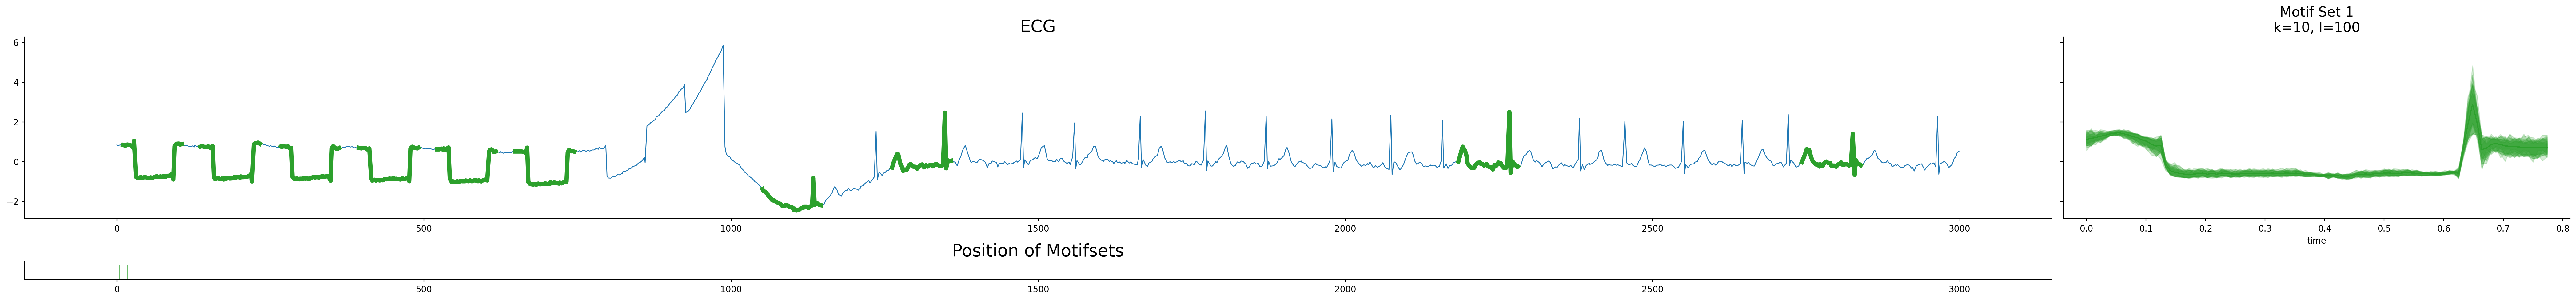

In [12]:
motifs = [[268, 396, 652, 12, 524, 140, 1050, 2744, 1265, 2184]]

_ = plot_motifsets(
    ds_name,
    series,
    motifsets=motifs,
    motif_length=100)

Data 3000
n: 2876 m 125 k 20 support 2
motiflet: [82, 466] extent=0.4340183964025611
n: 2876 m 125 k 20 support 3
motiflet: [29, 157, 413] extent=0.5975265242817669
n: 2876 m 125 k 20 support 4
motiflet: [478, 94, 606, 350] extent=0.8071991766802459
n: 2876 m 125 k 20 support 5
motiflet: [414, 30, 158, 286, 542] extent=0.8552688257273833
n: 2876 m 125 k 20 support 6
motiflet: [276, 404, 20, 660, 532, 148] extent=1.1422312044081193
n: 2876 m 125 k 20 support 7
motiflet: [669, 541, 285, 413, 29, 157, 797] extent=3.6534761216542755
n: 2876 m 125 k 20 support 8
motiflet: [1923, 1717, 1611, 1419, 1816, 2772, 2212, 2495] extent=4.4769740734646675
n: 2876 m 125 k 20 support 9
motiflet: [1934, 1430, 1827, 1728, 2783, 1622, 2506, 2223, 1515] extent=4.607789081383995
n: 2876 m 125 k 20 support 10
motiflet: [2508, 1624, 1517, 2117, 2225, 1730, 1936, 1432, 1829, 1307] extent=5.679634478465995
n: 2876 m 125 k 20 support 11
motiflet: [2516, 1632, 1525, 2125, 2233, 1738, 1944, 1837, 1315, 2688, 2421]

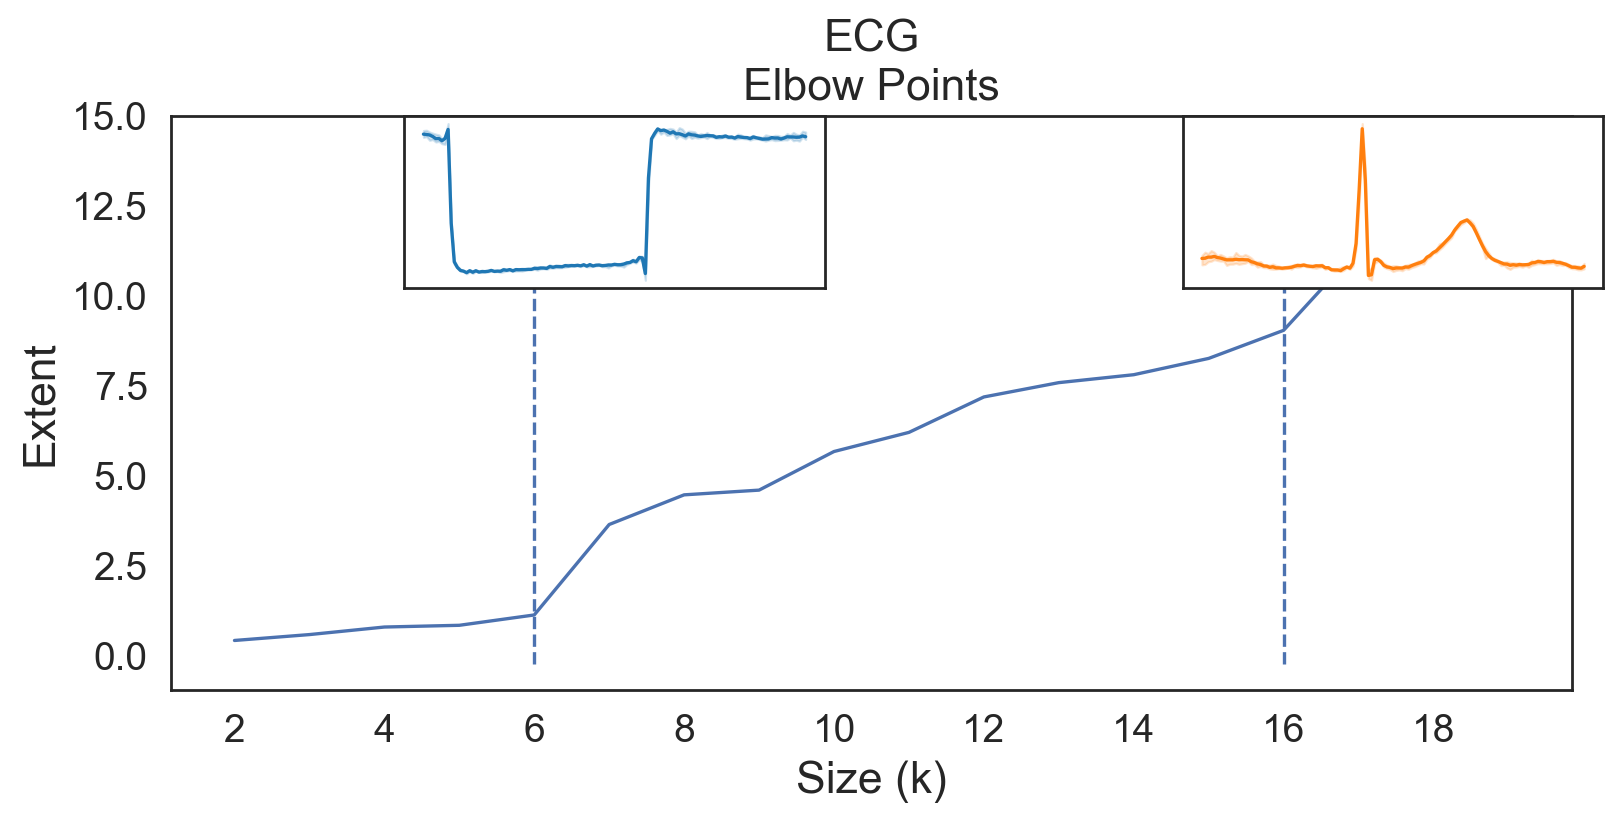

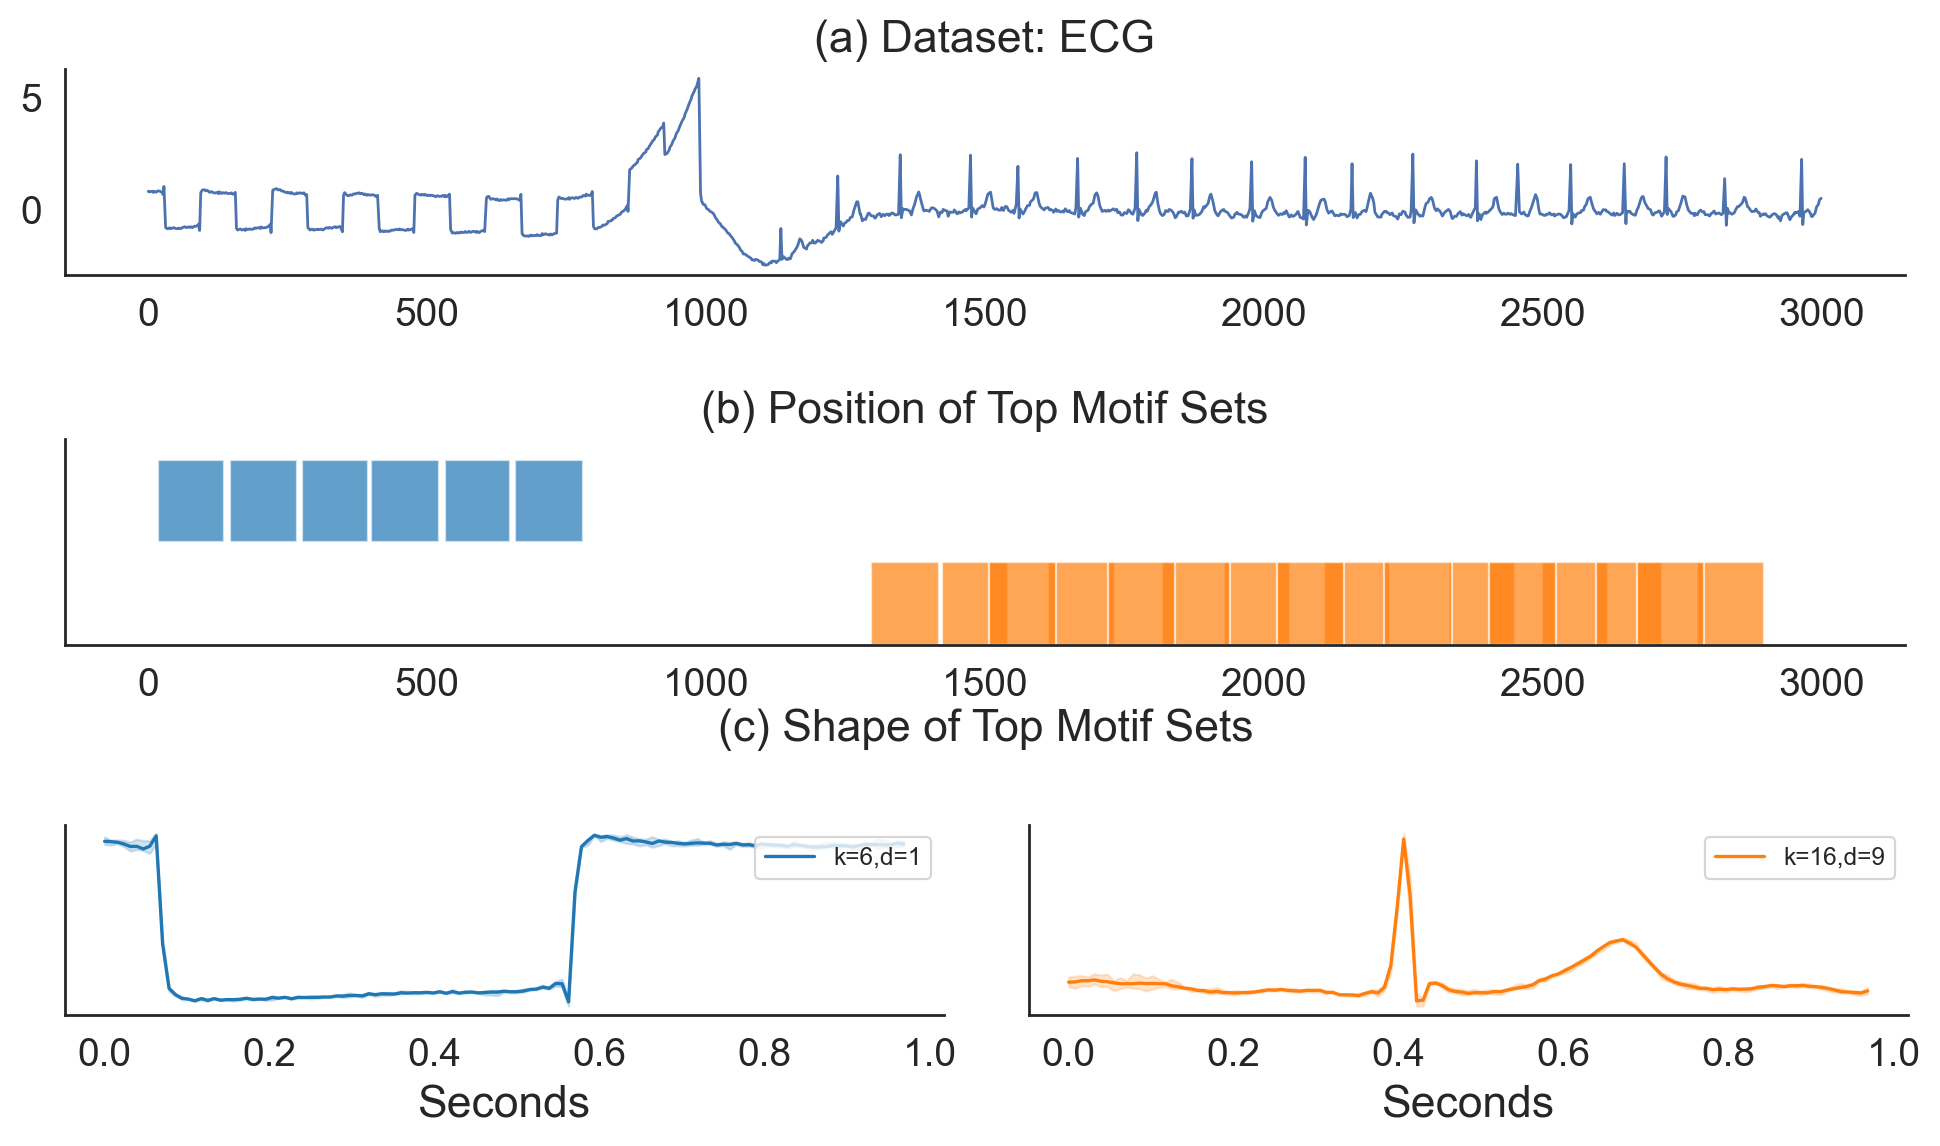

In [16]:
k=20
l=125
mot = Motiflets("ECG", series)
_ = mot.fit_k_elbow(k, l)

In [ ]:
print(np.sort(mot.motiflets[-1]))
print(mot.dists[-1])

In [ ]:
D_full, knns = ml.compute_distance_matrix(series.to_numpy(), 1000, 1)

In [ ]:
print(D_full.shape)
dim_index = np.zeros((D_full.shape[1], 1), dtype=np.int32)

In [ ]:
pos = np.sort(m.indices)
print(pos)

ml.get_pairwise_extent(D_full, pos, dim_index)**2
